In [1]:
from ipykernel import kernelapp as app
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.models import load_model
import matplotlib.pyplot as plt

directory = '/Users/lijiazheng/src/小作业/iris.data'

#read data 
iris_data=pd.read_csv(directory)
iris_data.columns = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'type']
x_data = iris_data.iloc[:,[0,1,2,3]].as_matrix()
types = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica':2}
iris_data.type = [types[item] for item in iris_data.type] 
y_data = iris_data.iloc[:,[4]].as_matrix()

Using TensorFlow backend.
/Users/lijiazheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/lijiazheng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [2]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch': [], 'epoch': []}
        self.accuracy = {'batch': [], 'epoch': []}
        self.val_loss = {'batch': [], 'epoch': []}
        self.val_acc = {'batch': [], 'epoch': []}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # train acc 训练集准确率 accuracy
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val acc 验证集准确率 validation 
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val loss 
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper left")
        plt.show()


In [3]:
x_train, x_test, y_init_train, y_init_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
print(x_train.shape)
y_train = keras.utils.to_categorical(y_init_train, num_classes=3)
y_test = keras.utils.to_categorical(y_init_test, num_classes=3)
print(y_train.shape)
print(y_test[:1])

(120, 4)
(120, 3)
[[1. 0. 0.]]


Train on 120 samples, validate on 30 samples
Epoch 1/30
120/120 [==============================] - 1s 5ms/step - loss: 1.1264 - accuracy: 0.1000 - val_loss: 1.1195 - val_accuracy: 0.2000
Epoch 2/30
120/120 [==============================] - 0s 55us/step - loss: 1.0862 - accuracy: 0.3667 - val_loss: 1.1009 - val_accuracy: 0.2000
Epoch 3/30
120/120 [==============================] - 0s 68us/step - loss: 1.0501 - accuracy: 0.3667 - val_loss: 1.0689 - val_accuracy: 0.2000
Epoch 4/30
120/120 [==============================] - 0s 70us/step - loss: 1.0126 - accuracy: 0.3667 - val_loss: 1.0143 - val_accuracy: 0.2000
Epoch 5/30
120/120 [==============================] - 0s 63us/step - loss: 0.9718 - accuracy: 0.3750 - val_loss: 0.9688 - val_accuracy: 0.5667
Epoch 6/30
120/120 [==============================] - 0s 78us/step - loss: 0.9341 - accuracy: 0.5917 - val_loss: 0.9245 - val_accuracy: 0.5667
Epoch 7/30
120/120 [==============================] - 0s 63us/step - loss: 0.8924 - accuracy: 0.69

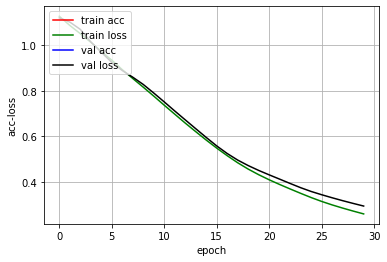

In [4]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=4))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# lr表示学习速率，momentum表示动量项，decay是学习速率的衰减系数(每个epoch衰减一次)
# Nesterov的值是False或者True，表示使不使用Nesterov momentum
# SGD随机梯度下降
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# 编译模型
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# 创建一个实例history
history = LossHistory()

# 训练
model.fit(x_train, y_train,
          epochs=30,  # 数据被轮30次
          batch_size=128,
          validation_data=(x_test, y_test),
          callbacks=[history])

score = model.evaluate(x_test, y_test, verbose=0, batch_size=128)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

label_pred = model.predict_classes(x_test, verbose=0)
print("label_pred4test:\n", label_pred)
print("label_init4test:\n", np.squeeze(np.asarray(y_init_test)))
label_pred4train = model.predict_classes(x_train, verbose=0)
print("label_pred4train:\n", label_pred4train)
print("label_init4train:\n", np.squeeze(np.asarray(y_init_train)))

# 绘制acc-loss曲线
history.loss_plot('epoch')